In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
# в seaborn есть 5 предстуановленных стилей:
# white grid, dark grid, white, dark и ticks
sns.set_style('whitegrid')

In [3]:
# я строил всё на версии 0.11.2
print(sns.__version__)

0.11.2


## Seaborn и массивы данных

In [4]:
#seaborn может подгрузить популярные массивы данных
# по названиям из этого репозитория https://github.com/mwaskom/seaborn-data

titanic = sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 1. Одномерные гистограммы
Постройте гистограмму и одномерное распределение возраста пассажиров титанкиа

гуглите функцию **distplot**, смотрите, в каком столбце стоит возраст

C:\Users\almuravtsev\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

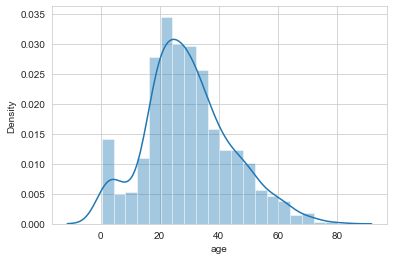

In [7]:
sns.distplot(titanic["age"])

C:\Users\almuravtsev\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


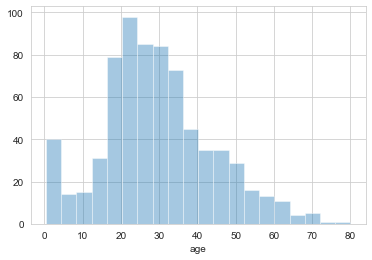

In [8]:
# по-умолчанию гистограмма строится вместе с распределением. Параметр kde позволяет оставить только гистограмму
fig = sns.distplot(titanic["age"], kde=False)

## 2. Двухмерные гистограммы
Постройте парную гистограмму "возраст-плата" 

гуглите функцию **jointplot**, смотрите в каких столбцах стоит возраст

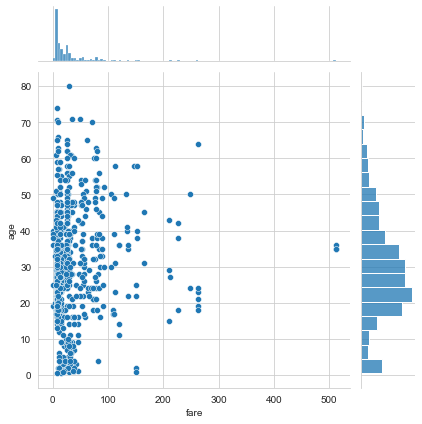

In [9]:
sns.jointplot(x='fare',y='age', data=titanic)
# похоже, что есть корреляция?

In [10]:
# давайте проверим через Pandas
titanic.corr()["fare"]["age"]

0.09606669176903912

но зато про богачей мы уже кое-что можем сказать

## 3. Ящики с усами

Проверьте, как соотносятся стоимости билетов для разных классов пассажиров: постройте для каждого класса ящик с усами по стоимости билета

Гуглите функцию **boxplot**

In [11]:
# кстати, сколько всего классов пасажирских билетов было на титанике?
# проверим

titanic["class"]

0       Third
1       First
2       Third
3       First
4       Third
        ...  
886    Second
887     First
888     Third
889     First
890     Third
Name: class, Length: 891, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

(0.0, 250.0)

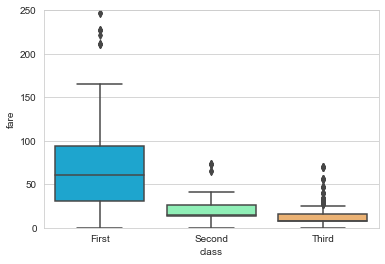

In [12]:
ax = sns.boxplot(x='class',y='fare',data=titanic, palette='rainbow')
ax.set_ylim([0, 250])

In [13]:
# причём все эти графики - до сих пор объекты matplotlib!
# просто модифицированные seaborn'ом

type(ax)

matplotlib.axes._subplots.AxesSubplot

## 4. Гистограмма по категориальной переменной

гуглите функцию **countplot** и с первого раза угадайте, как называется столбец, которые отвечает за пол пассажира

<AxesSubplot:xlabel='sex', ylabel='count'>

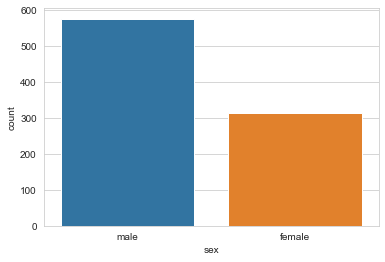

In [14]:
sns.countplot(x='sex',data=titanic)

гистограмма по категориальной переменной в одну строку в Python - красота!

## 5. Корреляционные матрицы и кросс-плоты
расслабьтесь и просто запустите блоки ниже и соотнесите значения к-тов корреляции с кросс-плотами некоторых из этих величин ниже

Text(0.5, 1.0, 'titanic.corr()')

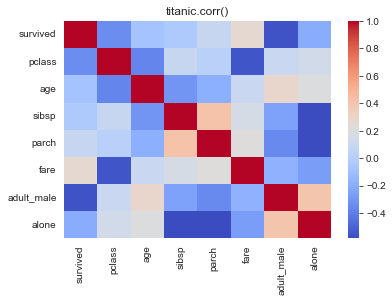

In [15]:
fig = sns.heatmap(titanic.corr(),cmap='coolwarm')
plt.title('titanic.corr()')

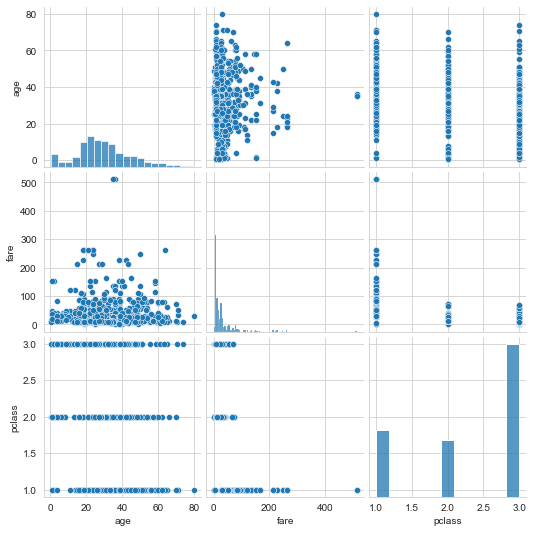

In [16]:
sns.pairplot(titanic[["age", "fare", "pclass"]])

In [17]:
# какие переменные коррелируют сильнее всего?
titanic[["adult_male", "alone"]].corr()

,adult_male,alone
adult_male,1.000000,0.404744
alone,0.404744,1.000000


![Well](https://i.kym-cdn.com/entries/icons/mobile/000/003/619/ForeverAlone.jpg)

In [18]:
import plotly.tools as tls
import plotly.offline as py

In [19]:
plotly_fig = tls.mpl_to_plotly(fig)
# plotly_fig = go.Figure(plotly_fig) 
# plotly_fig.show()

AttributeError: 'AxesSubplot' object has no attribute 'canvas'